In [1]:
import pandas as pd
import numpy as np

In [2]:
tweet_path = r"Tweets.csv"
df = pd.read_csv(tweet_path)

In [3]:
print("Original Dataset")
df.head()

Original Dataset


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [4]:
# create dataframe of relevant columns
df = df[['text', 'airline_sentiment']]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [5]:
# data preprocessing
df['text'] = df['text'].str.lower()
df['text'] = df['text'].replace('[^a-zA-Z\\s]', '', regex=True)  # Remove non-alphabetic characters
df['text'] = df['text'].replace(r'http\S+', '', regex=True)  # Remove URLs
print(df['text'])

0                                                                                                                      virginamerica what dhepburn said
1                                                                                    virginamerica plus youve added commercials to the experience tacky
2                                                                                     virginamerica i didnt today must mean i need to take another trip
3                               virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4                                                                                                 virginamerica and its a really big bad thing about it
                                                                              ...                                                                      
14635                                                                                   

In [6]:
# create a bag of words
bag_of_words = set()
for text in df['text']:
    words = text.split()
    bag_of_words.update(words)

bag_of_words = list(bag_of_words)
print(bag_of_words)    

['hold', 'journey', 'modifications', 'cheapslogannotmotto', 'resort', 'addition', 'asgmnt', 'tripnever', 'choice', 'supported', 'dayreward', 'telephone', 'responsiveness', 'hp', 'lotttttttt', 'cabinfever', 'payed', 'chgd', 'cannot', 'stephenrodrick', 'curb', 'ricdfw', 'trash', 'german', 'loads', 'cdt', 'fltnext', 'oahu', 'wbroken', 'rubber', 'unaware', 'flightedrescheduled', 'insulted', 'flightness', 'smith', 'wendell', 'peopleon', 'nocrew', 'busted', 'husain', 'capn', 'agojetblue', 'however', 'impossibly', 'outcome', 'challenges', 'simply', 'timed', 'foreign', 'sd', 'wellpriced', 'wconnection', 'boardingpass', 'scenarios', 'hasshe', 'exceed', 'problemjust', 'snack', 'concerning', 'strategy', 'wcancelled', 'standbylots', 'per', 'lrunscupcakes', 'switch', 'misread', 'writers', 'pig', 'nit', 'travels', 'givethemraises', 'lazy', 'worn', 'unload', 'light', 'hired', 'barklays', 'responseservice', 'insulting', 'urgentlyget', 'lofty', 'hungary', 'sentinel', 'rings', 'destroying', 'itunesmusic

In [7]:
# test train split
split_ratio = 0.8
train_size =int(len(df)*split_ratio)
# print(train_size)
train_data = df[:train_size]
test_data = df[train_size:]
# test_size = len(test_data)
# print(test_size)
# print(test_size + train_size)

In [8]:
# naive bayes implementation

from collections import defaultdict
def naiveBayes(train_data):
    # separate data based on sentiments 
    positive_data = train_data[train_data['airline_sentiment'] == 'positive']   
    negative_data = train_data[train_data['airline_sentiment'] == 'negative']   
    neutral_data = train_data[train_data['airline_sentiment'] == 'neutral']

    # calculate prior probabilities
    prior_positive = len(positive_data) / len(train_data)   
    prior_negative = len(negative_data) / len(train_data)   
    prior_neutral = len(neutral_data) / len(train_data)

    # store words frequency in dictionary
    positive_word_freq = defaultdict(int)
    negative_word_freq = defaultdict(int)
    neutral_word_freq = defaultdict(int)
    # print(prior_positive)
    # print(prior_negative)
    # print(prior_neutral)

    # count words in positive tweets
    for text in positive_data['text']:
        words = text.split()
        for word in words:
            positive_word_freq[word] += 1

    # count words in negative tweets
    for text in negative_data['text']:
        words = text.split()
        for word in words:
            negative_word_freq[word] += 1

    # count words in neutral tweets
    for text in neutral_data['text']:
        words = text.split()
        for word in words:
            # print(word)
            neutral_word_freq[word] += 1  

    return prior_positive, prior_negative, prior_neutral, positive_word_freq, negative_word_freq, neutral_word_freq

prior_positive, prior_negative, prior_neutral, positive_word_freq, negative_word_freq, neutral_word_freq = naiveBayes(train_data)

In [9]:
# predict sentiment for the given tweet
def prediction(tweet, prior_positive, prior_negative, prior_neutral, positive_word_freq, negative_word_freq, neutral_word_freq):
    words = tweet.split()
    positive_prob = prior_positive
    negative_prob = prior_negative
    neutral_prob = prior_neutral

    # calculate likelihood based on word frequency
    for word in words:
        positive_prob *= (positive_word_freq[word] + 1) / (sum(positive_word_freq.values()) + len(positive_word_freq))
        negative_prob *= (negative_word_freq[word] + 1) / (sum(negative_word_freq.values()) + len(negative_word_freq))
        neutral_prob *= (neutral_word_freq[word] + 1) / (sum(neutral_word_freq.values()) + len(neutral_word_freq))

    # choose sentiment with the highest probability
    if max(positive_prob, negative_prob, neutral_prob) == positive_prob:
        return 'positive'    
    if max(positive_prob, negative_prob, neutral_prob) == negative_prob:
        return 'negative'   
    if max(positive_prob, negative_prob, neutral_prob) == neutral_prob:
        return 'neutral'   
    

# tweet = "i love youhoho"
# tweet1 = "if this year has taught me anything its that grief can destroy any person."
# tweet2 = "it didnt hurt. i wasnt scared."
# result = prediction(tweet, prior_positive, prior_negative, prior_neutral, positive_word_freq, negative_word_freq, neutral_word_freq)
# print(result)

In [10]:
#evaluate performance
def eval_model(test_data, prior_positive, prior_negative, prior_neutral, positive_word_freq, negative_word_freq, neutral_word_freq):
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0

    for i in range(len(test_data)):
        tweet = test_data.iloc[i]['text']
        true_sentiment = test_data.iloc[i]['airline_sentiment']
        predicted_sentiment = prediction(tweet, prior_positive, prior_negative, prior_neutral,positive_word_freq, negative_word_freq, neutral_word_freq)
        #print(i, tweet, predicted_sentiment)

        # update the confusion matrix
        if true_sentiment == 'positive' and predicted_sentiment == 'positive':
            true_positive += 1
        elif true_sentiment == 'negative' and predicted_sentiment == 'negative':
            true_negative += 1
        elif true_sentiment == 'positive' and predicted_sentiment == 'negative':
            false_negative += 1
        elif true_sentiment == 'negative' and predicted_sentiment == 'positive':
            false_positive += 1   
    # Calculate metrics
    accuracy = (true_positive + true_negative) / len(test_data)
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0    

    return accuracy, precision, recall, f1_score          

# eval_model(test_data, prior_positive, prior_negative, prior_neutral, positive_word_freq, negative_word_freq, neutral_word_freq)

In [11]:
accuracy, precision, recall, f1_score = eval_model(test_data, prior_positive, prior_negative, prior_neutral, positive_word_freq, negative_word_freq, neutral_word_freq)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1_score:.2f}')

Accuracy: 0.70
Precision: 0.74
Recall: 0.75
F1-Score: 0.75


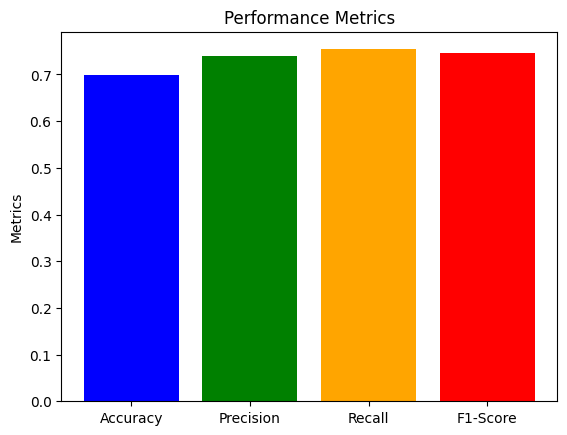

In [12]:
import matplotlib.pyplot as plt

# Plotting
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

fig, ax = plt.subplots()
ax.bar(labels, values, color=['blue', 'green', 'orange', 'red'])

# Adding labels and title
ax.set_ylabel('Metrics')
ax.set_title('Performance Metrics')
plt.show()